Importing all the necessary functions and libraries to run the code

In [5]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import seaborn as sns


Loading the data as pandas dataframe and specifying the required columns. I pre-processed the data in Excel by shifting the cells into their appropriate columns and also shuffled all the observations by creating a new column of random values and sorting them. You can find the data printed below

In [6]:
data = pd.read_csv("C:/Users/neeraj/Downloads/classification_data2.csv")

In [7]:
print(data)

      area  perimeter  compactness  kernel_length  kernel_width   asym  \
0    11.56      13.31       0.8198          5.363         2.683  4.062   
1    16.63      15.46       0.8747          6.053         3.465  2.040   
2    16.77      15.62       0.8638          5.927         3.438  4.920   
3    15.49      14.94       0.8724          5.757         3.371  3.412   
4    17.55      15.66       0.8991          5.791         3.690  5.366   
5    15.69      14.75       0.9058          5.527         3.514  1.599   
6    15.38      14.77       0.8857          5.662         3.419  1.999   
7    13.74      14.05       0.8744          5.482         3.114  2.932   
8    18.81      16.29       0.8906          6.272         3.693  3.237   
9    18.36      16.52       0.8452          6.666         3.485  4.933   
10   12.36      13.19       0.8923          5.076         3.042  3.220   
11   14.38      14.21       0.8951          5.386         3.312  2.462   
12   14.79      14.52       0.8819    

Gives a description of the data

In [8]:
data.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


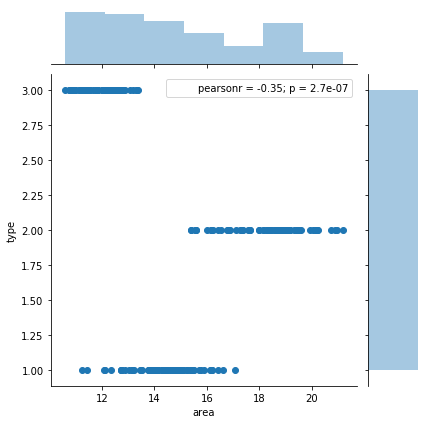

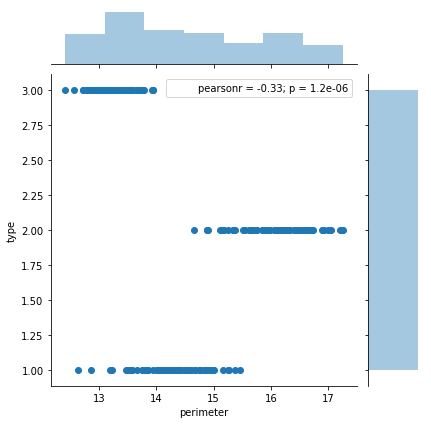

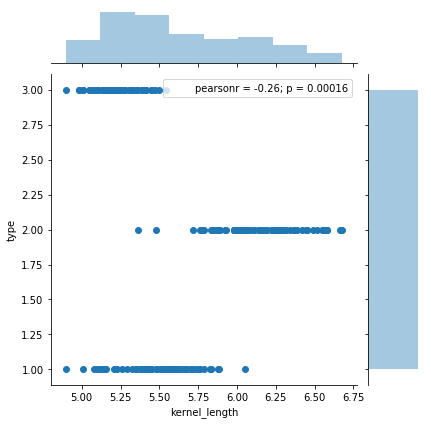

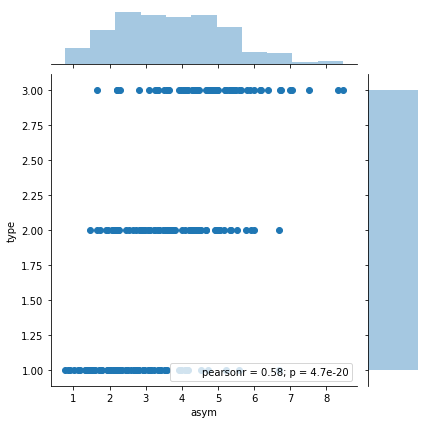

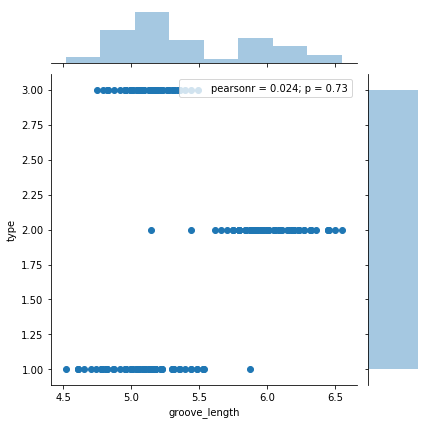

In [10]:
sns.jointplot(x='area',y='type',data=data)
sns.jointplot(x='perimeter',y='type',data=data)
sns.jointplot(x='kernel_length',y='type',data=data)
sns.jointplot(x='asym',y='type',data=data)
sns.jointplot(x='groove_length',y='type',data=data)
plt.show()

Gives us the correlation values of the attributes

In [30]:
data.corr()

,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length,type
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
kernel_length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
kernel_width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asym,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
groove_length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


Loading the features into predictors and the target variable into 'target'

In [31]:
predictors=data.iloc[:, :-1]
target=data.iloc[:,-1]
print(predictors)
print(target)

      area  perimeter  compactness  kernel_length  kernel_width   asym  \
0    11.56      13.31       0.8198          5.363         2.683  4.062   
1    16.63      15.46       0.8747          6.053         3.465  2.040   
2    16.77      15.62       0.8638          5.927         3.438  4.920   
3    15.49      14.94       0.8724          5.757         3.371  3.412   
4    17.55      15.66       0.8991          5.791         3.690  5.366   
5    15.69      14.75       0.9058          5.527         3.514  1.599   
6    15.38      14.77       0.8857          5.662         3.419  1.999   
7    13.74      14.05       0.8744          5.482         3.114  2.932   
8    18.81      16.29       0.8906          6.272         3.693  3.237   
9    18.36      16.52       0.8452          6.666         3.485  4.933   
10   12.36      13.19       0.8923          5.076         3.042  3.220   
11   14.38      14.21       0.8951          5.386         3.312  2.462   
12   14.79      14.52       0.8819    

Splitting the entire dataset into training and test datasets and 20% of the data is used to test the accuracy of the model

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.2)


Using Linear Kernel

In [33]:
kernel_lin = (GridSearchCV(KernelRidge( kernel='linear'),cv = 5,param_grid={"alpha":[1]})).fit(X_train,Y_train)
Y_predicted_lin = kernel_lin.predict(X_test)
Y_predicted_lin = np.round(Y_predicted_lin)
print("Accuracy is : ",accuracy_score(Y_test, Y_predicted_lin))

Accuracy is :  0.666666666667


Using Polynomial kernel and Grid search to find the best parameters

In [37]:
kernel_poly = (GridSearchCV(KernelRidge(kernel='polynomial'),cv = 5,param_grid = {"alpha":[1],"coef0":[1],"degree":[2,3],"gamma":[1]})).fit(X_train,Y_train)
Y_predicted_poly = kernel_poly.predict(X_test)
Y_predicted_poly= np.round(Y_predicted_poly)
print("Accuracy is: ",accuracy_score(Y_test, Y_predicted_poly))
print("The best degree is:",kernel_poly.best_estimator_.degree)

Accuracy is:  0.785714285714
The best degree is: 2


Using Gaussian kernel with different gamma values and Grid Search to find the best parameters

In [38]:
kernel_gaus = (GridSearchCV(KernelRidge(kernel='rbf'),cv = 5,param_grid = {"gamma":[0.1,0.5,1,2,4]})).fit(X_train,Y_train)
Y_predicted_poly = kernel_gaus.predict(X_test)
Y_predicted_poly= np.round(Y_predicted_poly)
print("Accuracy while using Gaussian Kernel is: ",accuracy_score(Y_test, Y_predicted_poly))


Accuracy is:  0.809523809524


# Using Logistic Regression to build a model. The best model with dot accuracy!

In [40]:
log_reg = linear_model.LogisticRegressionCV(cv = 5,).fit(X_train,Y_train)
Y_predicted_log = log_reg.predict(X_test)
Y_predicted_log = np.round(Y_predicted_log)
print("Accuracy of logistic regression is: ",accuracy_score(Y_test, Y_predicted_log))

Accuracy is:  1.0


Using Soft SVM and different coefficient values

In [42]:
soft_svm = GridSearchCV(svm.SVC(), cv=5,param_grid={"C": [0.1,0.5,1,2,5]})
soft_svm.fit(X_train, Y_train)
Y_predicted_svsm = soft_svm.predict(X_test)
y_predicted_svsm = np.round(Y_predicted_svsm)
print("Accuracy of soft svsm is: ",accuracy_score(Y_test, Y_predicted_svsm))


Accuracy of soft svsm is:  0.904761904762


Using Hard Svm 

In [48]:
hard_svm = GridSearchCV(svm.SVC(), cv=5,param_grid={"C": [987654321000]})
hard_svm.fit(X_train, Y_train)
Y_predicted_hsvm = hard_svm.predict(X_test)
Y_predicted_hsvm = np.round(Y_predicted_hsvm)
print("Accuracy of hard svsm is: ",accuracy_score(Y_test, Y_predicted_hsvm))

Accuracy of hard svsm is:  0.97619047619


The best model for this dataset is the model built using Logistic Regression which has a flawless prediction accuracy of 1.0